In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.diagnostic import normal_ad

гипотезы о том что а не если

In [2]:
df = pd.read_csv("Задания/Datasets/babyboom.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')
df.columns = ['TimeOfBirth', 'Sex', 'Weight', 'MinutesAfterMidnight']
print(df.shape)
df.head(20)

(44, 4)


C:\Users\Acer\AppData\Local\Temp\ipykernel_19792\104793328.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Задания/Datasets/babyboom.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')


,TimeOfBirth,Sex,Weight,MinutesAfterMidnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   TimeOfBirth           44 non-null     int64
 1   Sex                   44 non-null     int64
 2   Weight                44 non-null     int64
 3   MinutesAfterMidnight  44 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


In [29]:
data = df.copy()
df.isnull().sum()

TimeOfBirth             0
Sex                     0
Weight                  0
MinutesAfterMidnight    0
dtype: int64

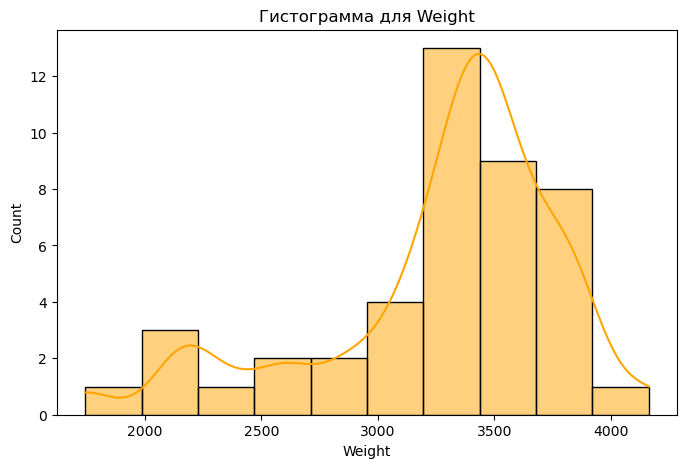

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Weight'], kde=True, color='orange',kde_kws={'bw_adjust': 0.5})  
# kde=True добавляет линию плотности
# dw_adjust настраивает уровень сглаживания kde
plt.title(f'Гистограмма для Weight')
plt.show()

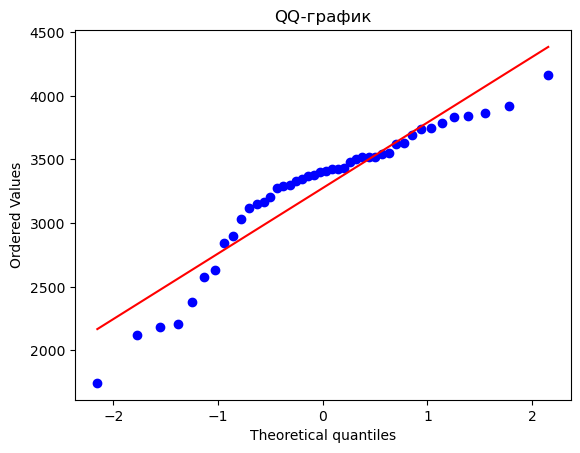

In [31]:
# QQ-график
stats.probplot(df['Weight'], dist="norm", plot=plt)
plt.title('QQ-график')
plt.show()

In [32]:
# 1. Shapiro-Wilk
stat, p = stats.shapiro(df['Weight'])
print('Shapiro-Wilk:')
print('Статистика:', stat, 'p-значение:', p)
if p<0.05:
    print( "Нет нормального расспределения")
if p>0.05:
    print( "Есть нормальное расспределение")
# 2. Cramer-von Mises
result = stats.cramervonmises(df['Weight'], 'norm')
print('Cramer-von Mises:')
print('Статистика:', result.statistic)
print('p-значение:', result.pvalue)
if result.pvalue<0.05:
    print( "Нет нормального расспределения")
if result.pvalue>0.05:
    print( "Есть нормальное расспределение")
# 3. Lilliefors (Kolmogorov-Smirnov)
stat, p = stats.kstest(df['Weight'], 'norm', args=(df['Weight'].mean(), df['Weight'].std()))
print('Lilliefors (Kolmogorov-Smirnov):')
print('Статистика:', stat, 'p-значение:', p)
if p<0.05:
    print( "Нет нормального расспределения")
if p>0.05:
    print( "Есть нормальное расспределение")
# 4. Anderson-Darling
result = stats.anderson(df['Weight'], dist='norm')
print('Anderson-Darling:')
print('Статистика:', result.statistic)
print('Критические значения:', result.critical_values)
print('Уровни значимости:', result.significance_level)
# 5. Jarque-Bera
stat, p = stats.jarque_bera(df['Weight'])
print('Jarque-Bera:')
print('Статистика:', stat, 'p-значение:', p)
if p<0.05:
    print( "Нет нормального расспределения")
if p>0.05:
    print( "Есть нормальное расспределение")
# 6 Shapiro-Francia
stat, p = stats.shapiro(df['Weight'] / np.std(df['Weight']))
print('Shapiro-Francia:')
print('Статистика:', stat, 'p-значение:', p)
if p<0.05:
    print( "Нет нормального расспределения")
if p>0.05:
    print( "Есть нормальное расспределение")
# 7 Pirson
# 1. Создание гистограммы
observed_freq, bins = np.histogram(df['Weight'], bins='auto')

# Убираем интервалы с нулевой частотой
non_zero_indices = np.where(observed_freq > 0)[0]
observed_freq = observed_freq[non_zero_indices]
bins = bins[non_zero_indices]

# 2. Вычисление ожидаемой частоты
mean = df['Weight'].mean()
std_dev = df['Weight'].std()
n = len(df['Weight'])

# Пересчитываем ожидаемую частоту с правильными границами
expected_freq = np.array([
    n * (stats.norm.cdf(bins[i + 1], mean, std_dev) - 
         stats.norm.cdf(bins[i], mean, std_dev))
    for i in range(len(bins) - 1)
])

# Убираем нулевые ожидаемые частоты, если они есть
valid_indices = np.where(expected_freq > 0)[0]
observed_freq = observed_freq[valid_indices]
expected_freq = expected_freq[valid_indices]

# Проверка сумм
print("Pirson:")
print("Сумма наблюдаемых частот:", np.sum(observed_freq))
print("Сумма ожидаемых частот:", np.sum(expected_freq))

# 3. Проведение теста хи-квадрат
if observed_freq.size == expected_freq.size and np.isclose(np.sum(observed_freq), np.sum(expected_freq)):
    chi2_stat, p = stats.chisquare(observed_freq, expected_freq)
    print('Критерий Пирсона (Chi-square):')
    print('Статистика:', chi2_stat, 'p-значение:', p)
else:
    print("Ошибка: размеры наблюдаемых и ожидаемых частот не совпадают или их суммы различаются.")

Shapiro-Wilk:
Статистика: 0.8987229755100873 p-значение: 0.0009943974027275867
Нет нормального расспределения
Cramer-von Mises:
Статистика: 14.66666666666667
p-значение: 0
Нет нормального расспределения
Lilliefors (Kolmogorov-Smirnov):
Статистика: 0.18336357215784677 p-значение: 0.09106523162555868
Есть нормальное расспределение
Anderson-Darling:
Статистика: 1.7168461277690241
Критические значения: [0.534 0.609 0.73  0.852 1.013]
Уровни значимости: [15.  10.   5.   2.5  1. ]
Jarque-Bera:
Статистика: 10.351560931737778 p-значение: 0.0056518041519338
Нет нормального расспределения
Shapiro-Francia:
Статистика: 0.898722975510087 p-значение: 0.0009943974027275683
Нет нормального расспределения
Pirson:
Сумма наблюдаемых частот: 43
Сумма ожидаемых частот: 39.025811667936466
Ошибка: размеры наблюдаемых и ожидаемых частот не совпадают или их суммы различаются.


    p-значение < 0.05 (или 0.01): Это указывает на то, что данные не распределены нормально.    
    Если бы p-значение было больше 0.05, это указывало бы что данные нормально распределены.
    
    Получается общие данные не подчиняются нормальному распределению не по одному из критериев


## Проверка статистических гипотез

### 1. Выдвижение гипотез

1. **Нулевая гипотеза (\( H_0 \))** и **альтернативная гипотеза (\( H_1 \))**.
2. Задается уровень значимости критерия \( \alpha \). Обычно \( \alpha \) выбирается равным 0.001, 0.01 или 0.05.

---

### 2. Выбор статистики критерия

- Выбирается статистика критерия \( \gamma(X[n]) \), так, что при условии справедливости гипотезы \( H_0 \), статистика \( \gamma(X[n]) \) подчиняется некоторому известному закону распределения вероятностей.

---

### 3. Определение критической области

- В качестве критической области для гипотезы \( H_0 \) выбирается такая область возможных значений статистики \( \gamma(X[n]) \), попадание в которую при условии справедливости гипотезы \( H_0 \) выглядит маловероятным по сравнению с возможностью попадания статистики \( \gamma(X[n]) \) в указанную область при условии справедливости гипотезы \( H_1 \).

#### Критическая область может состоять из одного интервала:
- \( (-\infty, z_\alpha) \) или \( (z_{1-\alpha}, \infty) \), где \( z_\alpha \) и \( z_{1-\alpha} \) — квантили уровней \( \alpha \) и \( 1-\alpha \) закона распределения, которому подчиняется (возможно, асимптотически) статистика \( \gamma(X[n]) \).

#### Критическая область может состоять из двух интервалов:
- \( (-\infty, z_{\alpha/2}) \) и \( (z_{1-\alpha/2}, \infty) \), где \( z_{\alpha/2} \) и \( z_{1-\alpha/2} \) — квантили уровней \( \alpha/2 \) и \( 1-\alpha/2 \).

---

### 4. Принятие или отклонение гипотезы

- Если численное значение статистики \( \gamma(X[n]) \) попадает в критическую область, то нулевая гипотеза \( H_0 \) отклоняется (с вероятностью ошибки \( \alpha \)), и принимается альтернативная гипотеза \( H_1 \).
- Если численное значение статистики \( \gamma(X[n]) \) не попадает в критическую область, то нет оснований отвергнуть нулевую гипотезу.

---

### 5. Альтернативный подход: p-value

- Найдем вероятность, которая называется **p-значением (p-value)**. Это вероятность при справедливости нулевой гипотезы получить более экстремальные значения.
- Если p-value меньше заданного уровня значимости (обычно 0.05), то нулевая гипотеза отвергается в пользу альтернативной.
- Если p-value больше заданного уровня значимости, то нулевая гипотеза не отвергается.

---


In [33]:
#Будем работать с критерием shapiro-wilk
boys_data = df[df['Sex'] == 2]
girl_data = df[df['Sex'] == 1]

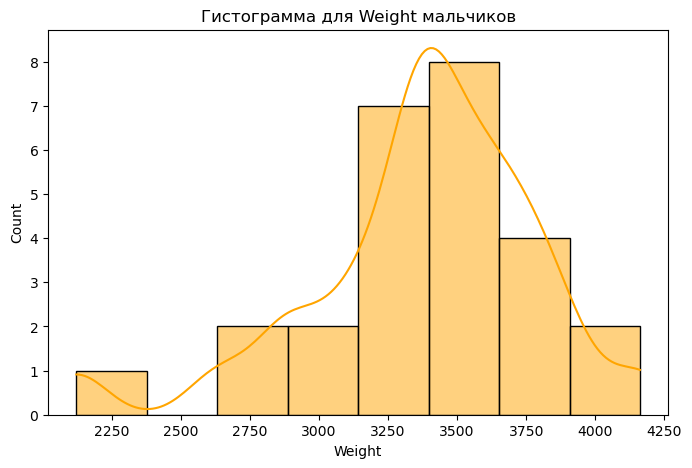

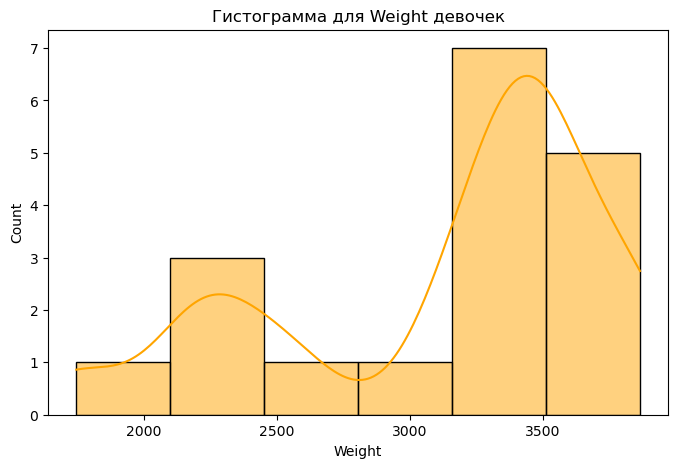

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(boys_data['Weight'], kde=True, color='orange',kde_kws={'bw_adjust': 0.5})  
# kde=True добавляет линию плотности
# dw_adjust настраивает уровень сглаживания kde
plt.title(f'Гистограмма для Weight мальчиков')
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(girl_data['Weight'], kde=True, color='orange',kde_kws={'bw_adjust': 0.5})  
# kde=True добавляет линию плотности
# dw_adjust настраивает уровень сглаживания kde
plt.title(f'Гистограмма для Weight девочек')
plt.show()

In [35]:
# Shapiro-Wilk
stat, p = stats.shapiro(boys_data['Weight'])
print('Shapiro-Wilk boys:')
print('Статистика:', stat, 'p-значение:', p)
if p<0.05:
    print( "Нет нормального расспределения")
if p>0.05:
    print( "Есть нормальное расспределение")
# Shapiro-Wilk
stat, p = stats.shapiro(girl_data['Weight'])
print('Shapiro-Wilk girls:')
print('Статистика:', stat, 'p-значение:', p)
if p<0.05:
    print( "Нет нормального расспределения")
if p>0.05:
    print( "Есть нормальное расспределение")

Shapiro-Wilk boys:
Статистика: 0.9474738942208476 p-значение: 0.20224825440795427
Есть нормальное расспределение
Shapiro-Wilk girls:
Статистика: 0.8702829450561838 p-значение: 0.017984789994719325
Нет нормального расспределения


    Получается данные мальчиков подчиняются нормальному распределению
    А девочек нет

In [43]:
# Извлекаем данные
data = df[['TimeOfBirth','Weight','MinutesAfterMidnight']]

# Расчет среднего и стандартного отклонения для каждого столбца
mean = data.mean()
std_dev = data.std(ddof=1)  # Используем ddof=1 для выборочного стандартного отклонения
n = len(data)

# Уровень доверия
confidence_level = 0.95
alpha = 1 - confidence_level

# Определяем критическое значение (z-значение для нормального распределения)
z_critical = stats.norm.ppf(1 - alpha / 2)

# Вычисляем стандартную ошибку
standard_error = std_dev / np.sqrt(n)

# Рассчитываем доверительные интервалы
margin_of_error = z_critical * standard_error

# Доверительные интервалы для среднего
confidence_intervals = (mean - margin_of_error, mean + margin_of_error)

# Определяем критические значения хи-квадрат
chi2_lower = stats.chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

# Вычисляем доверительные интервалы для стандартного отклонения
lower_bound = np.sqrt((n - 1) * std_dev**2 / chi2_upper)
upper_bound = np.sqrt((n - 1) * std_dev**2 / chi2_lower)

# Вывод результатов
for column in data.columns:
    print(f"Доверительный интервал для стандартного отклонения {column}: ({lower_bound[column]:.2f}, {upper_bound[column]:.2f})")
    print(f"Доверительный интервал для среднего {column}: {confidence_intervals[0][column]:.2f} - {confidence_intervals[1][column]:.2f}\n")


Доверительный интервал для стандартного отклонения TimeOfBirth: (570.68, 875.14)
Доверительный интервал для среднего TimeOfBirth: 1091.91 - 1500.09

Доверительный интервал для стандартного отклонения Weight: (436.27, 669.03)
Доверительный интервал для среднего Weight: 3119.93 - 3431.98

Доверительный интервал для стандартного отклонения MinutesAfterMidnight: (343.76, 527.17)
Доверительный интервал для среднего MinutesAfterMidnight: 665.79 - 911.66



# Доверительные интервалы для среднего и стандартного отклонения

1. **Доверительный интервал (CI)** — это диапазон значений, который с заданной вероятностью (уровень доверия) содержит истинное значение параметра распределения. Например, 95%-ный доверительный интервал указывает, что с вероятностью 95% истинное значение параметра находится в этом интервале.

## Доверительный интервал для среднего (\(\mu\))

2. **Формула для нормального распределения (при \(n > 30\)):**
   $$CI = \left( \bar{x} - z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}, \bar{x} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} \right)$$
   - \(\bar{x}\) — выборочное среднее.
   - \(\sigma\) — стандартное отклонение выборки.
   - \(n\) — объем выборки.
   - \(z_{\alpha/2}\) — квантиль стандартного нормального распределения, соответствующий уровню доверия (например, 1.96 для 95%).

3. **Формула для небольших выборок (при \(n < 30\)):**
   $$CI = \left( \bar{x} - t_{\alpha/2} \cdot \frac{s}{\sqrt{n}}, \bar{x} + t_{\alpha/2} \cdot \frac{s}{\sqrt{n}} \right)$$
   - \(s\) — выборочное стандартное отклонение.
   - \(t_{\alpha/2}\) — квантиль распределения Стьюдента с \(n-1\) степенями свободы.

## Доверительный интервал для стандартного отклонения (\(\sigma\))

4. **Формула для стандартного отклонения:**
   $$CI = \left( \sqrt{\frac{(n-1) s^2}{\chi^2_{\alpha/2, n-1}}}, \sqrt{\frac{(n-1) s^2}{\chi^2_{1-\alpha/2, n-1}}} \right)$$
   - \(s\) — выборочное стандартное отклонение.
   - \(\chi^2_{\alpha/2, n-1}\) — квантиль хи-квадрат распределения с \(n-1\) степенями свободы.

## Уровень доверия

5. **Уровень доверия** — это вероятность того, что истинное значение параметра находится в доверительном интервале.
   - Для уровня доверия 95%, квантиль \(z_{\alpha/2} = 1.96\).
   - Для уровня доверия 99%, квантиль \(z_{\alpha/2} = 2.576\).

6. **Основные замечания**:
   - Чем больше выборка (\(n\)), тем уже доверительный интервал, так как оценка становится более точной.
   - Доверительный интервал не гарантирует, что параметр точно находится внутри этого интервала, но с заданной вероятностью это верно.
   - Для малых выборок используется распределение Стьюдента, а для стандартного отклонения — \(\chi^2\)-распределение.



In [37]:
# Проверьте гипотезу о том, что время между рождением детей подчиняется экспоненциальному распределению.
# 1. Вычисляем разницы во времени между рождениями
df['TimeDiff'] = df['TimeOfBirth'].diff()
df['TimeDiff'] = df['TimeDiff'].fillna(0)
# Убираем NaT (первое значение, так как у него нет разницы)
time_diffs = df['TimeDiff']

# 2. Точечная оценка параметра
mean_time = np.mean(time_diffs)
lambda_hat = 1 / mean_time  # Оценка параметра λ

# 3. Формулировка гипотезы
alpha = 0.05  # Уровень значимости

# 4. Проведение теста Колмогорова-Смирнова
D_statistic, p_value = stats.kstest(time_diffs, 'expon', args=(0, 1/lambda_hat))

# 5. Проверка гипотезы
print(f"D-статистика: {D_statistic}, p-значение: {p_value}")

if p_value < alpha:
    print("Гипотеза не верна.")
else:
    print("В этом случае гипотеза подтвердилась.")

D-статистика: 0.09960928919270534, p-значение: 0.7377967746280287
В этом случае гипотеза подтвердилась.


In [38]:
# Проверьте гипотезу о том, что время между рождением детей подчиняется распределению Пуассона.
# 1. Вычисляем разницы во времени между рождениями
df['TimeDiff'] = df['TimeOfBirth'].diff()
df['TimeDiff'] = df['TimeDiff'].fillna(0)
# Убираем NaT (первое значение, так как у него нет разницы)
time_diffs = df['TimeDiff']

# 2. Точечная оценка параметра
mean_time = np.mean(time_diffs)
lambda_hat = 1 / mean_time  # Оценка параметра λ

# 3. Формулировка гипотезы
alpha = 0.05  # Уровень значимости

# 4. Проведение теста Колмогорова-Смирнова
D_statistic, p_value = stats.kstest(time_diffs, 'poisson', args=(0, 1/lambda_hat))

# 5. Проверка гипотезы
print(f"D-статистика: {D_statistic}, p-значение: {p_value}")

if p_value < alpha:
    print("Гипотеза не верна.")
else:
    print("В этом случае гипотеза подтвердилась.")

D-статистика: 0.5909090909090909, p-значение: 3.6018727295201554e-15
Гипотеза не верна.


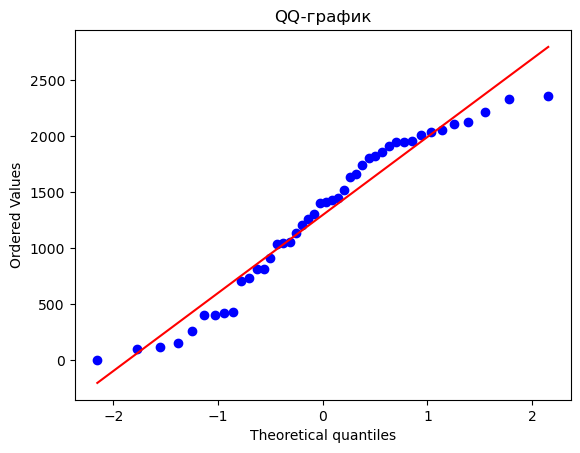

In [39]:
# QQ-график
stats.probplot(df['TimeOfBirth'], dist="norm", plot=plt)
plt.title('QQ-график')
plt.show()